# Исследование продаж компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Открытие файла и изучение общей информации

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [3]:
# оборачиваем в конструкцию для запуска локально или с платформы Яндекса
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [4]:
# просмотр первых 10 строк
print(df.head(10),'\n')

# просмотр общей информации файла
df.info()

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

## Предобработка данных

### Замена названия столбцов

In [6]:
#приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

#проверяем изменение названия столбцов
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Обработка пропусков

In [7]:
# определение пропусков в столбцах
print('До обработки \n', df.isna().sum(),'\n')

До обработки 
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64 



In [8]:
# проверяем есть ли нулевые значения в оценках пользователей
df.query('user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [9]:
# проверяем есть ли нулевые значения в оценках критиков
df.query('critic_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [10]:
# замена пропусков заглушками, чтобы не терять даннные и привести к нужному типу в последующем
df['rating'] = df['rating'].fillna('unknown')

# заменяем пропуски на 0
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)

# удаляем пропуски в столбце жанр, имя и год релиза, их колчество незначительно и они не повлияют на общую картину
df = df.dropna(subset=['genre', 'name', 'year_of_release']).reset_index(drop=True)

# проверка замененных пропусков
print('После обработки \n', df.isna().sum(),'\n')

После обработки 
 name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64 



**Вывод:**

Удалил пропуски в столбцах с именем, жанром и годом выпуска, так как пропусков незначительное количество, а релевантная замена не предоставляется возможной.

Пропуски в рейтинге заполнил словом неизвестно, для приобразования в дальнейшем в другой тип данных.

В оценках заменили пропуски на 0,  изучив что оценки ноль нет в оценках критиков а в оценках пользователей всего одна запись, может сделать вывод что 0 можно использовать как отсутствие оценки.

Пропуски могли возникнуть по двум причинам:
1. Данные собирались из разных источников и могла произойти ошибка при выгрузке и соединении данных;
2. Данные были намеренно пропущены так как это означает что этих данных нет по разным причинам (нет оценки, не захотели получать рейтинг).


### Преобразование данных в нужные типы

In [11]:
#Просматриваем тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
#проверяем уникальные значения столбцов в которых нужно преобразовать данные
print(df['user_score'].unique(),'\n')
print(df['critic_score'].unique(),'\n')
print(df['year_of_release'].unique(),'\n')
print(df['rating'].unique(),'\n')

#заменяем значение "tbd", на 0
df['user_score'] = df['user_score'].str.replace('tbd','0')
df['user_score'] = df['user_score'].fillna(0)


['8' 0 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7'] 

[76.  0. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.] 

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 200

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float64')
df['rating'] = df['rating'].astype('category')

In [14]:
#Просматриваем тип данных после преобразований
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  int32   
 3   genre            16444 non-null  object  
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     16444 non-null  int32   
 9   user_score       16444 non-null  float64 
 10  rating           16444 non-null  category
dtypes: category(1), float64(5), int32(2), object(3)
memory usage: 1.1+ MB


**Вывод:**

Ознакомившись с уникальными данными по столбцам в которых необходимо преобразовать данные сделал преобразование данных.

1. Год релиза привел к целым значениям как и пологается;
2. Оценки критиков без дробной части, привел к целым числам;
3. Оценка пользователей содержала текстовый атрибут, ознакомившись с его значением, заменил его на 0 (так как это означает в ожидании оценки или нет оценки), привел к вещественным числам;
4. Рейтинг привел к типу категория, чем он и является.

### Суммарные продажи во всех регионах

In [16]:
# добавляем новый столбец с сумарным объемом продаж
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# проверяем результат добавления столбца
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45            76         8.0        E   
1      3.58      6.81         0.77             0         0.0  unknown   
2     12.76      3.79         3.29            82         8.3        E   
3     10.93      3.28         2.95            80         8.0        E   
4      8.89     10.22         1.00             0         0.0  unknown   

   sum_sales  
0      82.54  
1      40.24  
2      35.52  
3      32.77  

## Исследовательский анализ

In [17]:
# Изучим описательную статистку
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,33.494405,3.234237,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,35.821558,3.689043,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


### Выпуск игр в разные годы

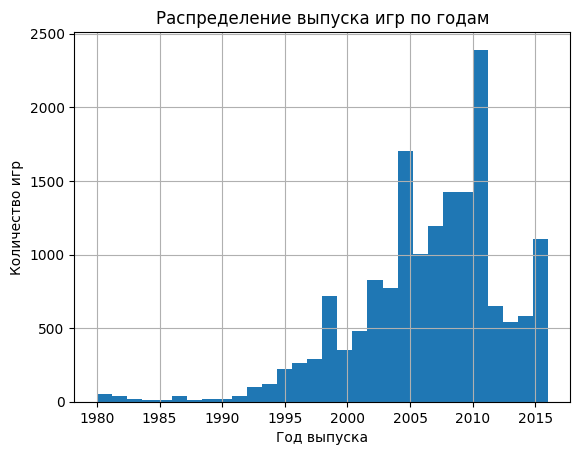

In [19]:
# строим гистограмму по годам выпуска
df['year_of_release'].hist(bins=30)
plt.title('Распределение выпуска игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Вывод:**

Исходя из гистограммы видно что основное количество игр приходиться на период с 2000 года, что так же подтверждает описательная статистика, 25% - 2003, медиана - 2006. При анализе данных по годам рекомендуется брать выборку с 2000 года. Если нужен актуальные период, то с 2012 года.

### Платформы игр

In [20]:
# Платформы с наибольшими суммарными продажами топ 10
df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sum_sales, dtype: float64

Сумма продаж игр PS2 по годам: 
 year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: sum_sales, dtype: float64


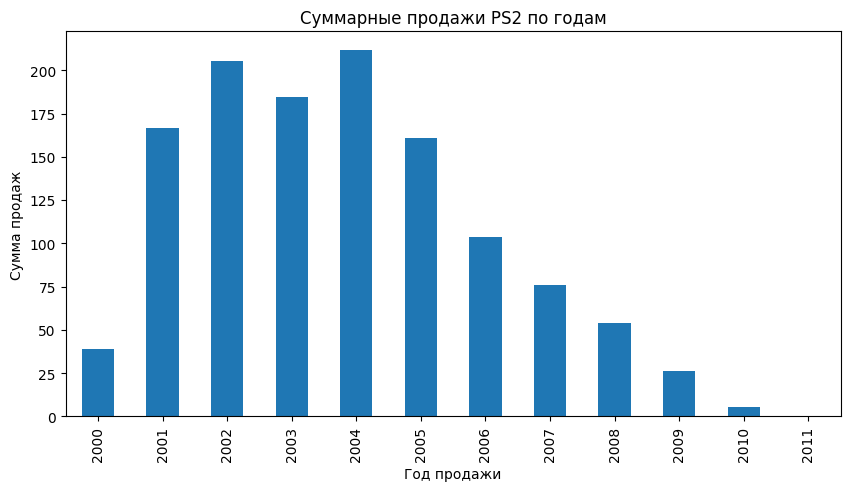

Сумма продаж игр X360 по годам: 
 year_of_release
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: sum_sales, dtype: float64


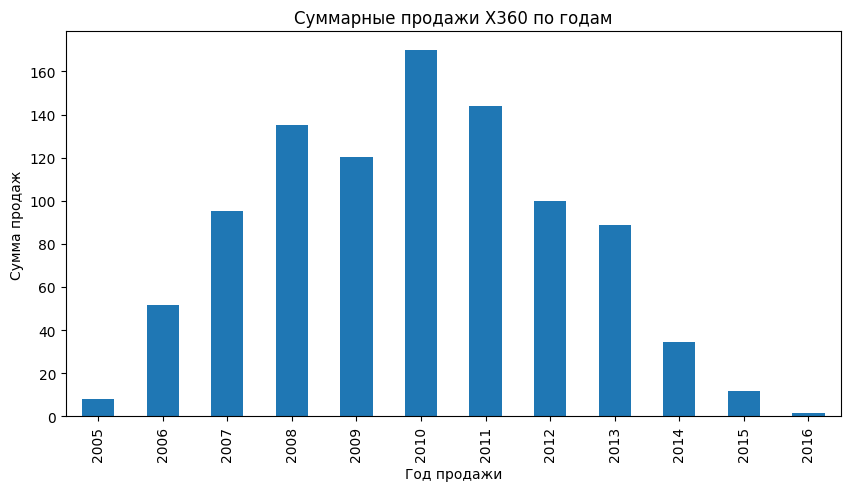

Сумма продаж игр PS3 по годам: 
 year_of_release
2006     20.96
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: sum_sales, dtype: float64


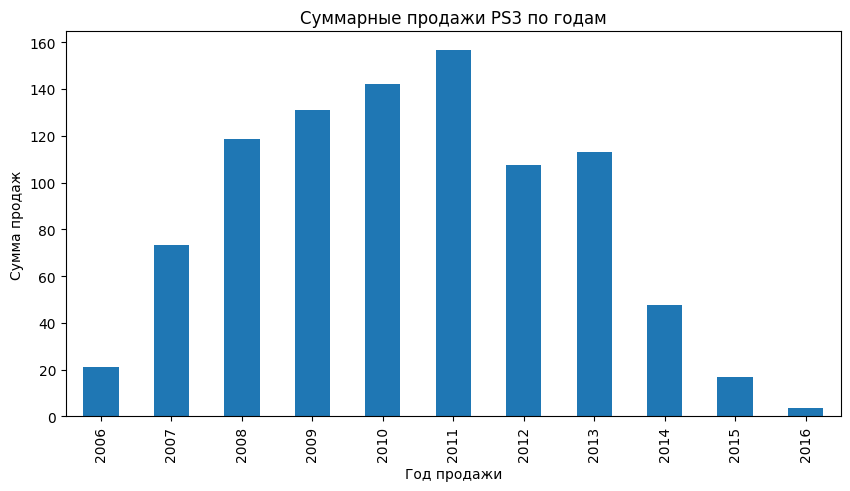

Сумма продаж игр Wii по годам: 
 year_of_release
2006    137.15
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: sum_sales, dtype: float64


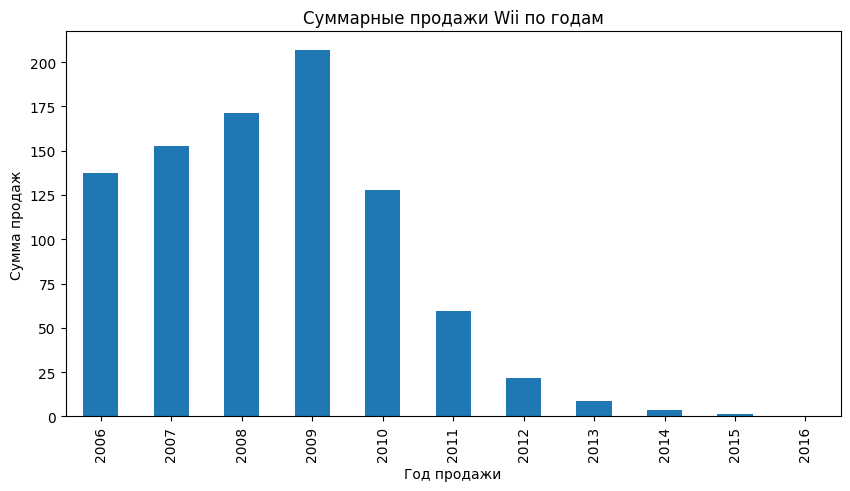

Сумма продаж игр DS по годам: 
 year_of_release
1985      0.02
2004     17.27
2005    130.14
2006    119.81
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: sum_sales, dtype: float64


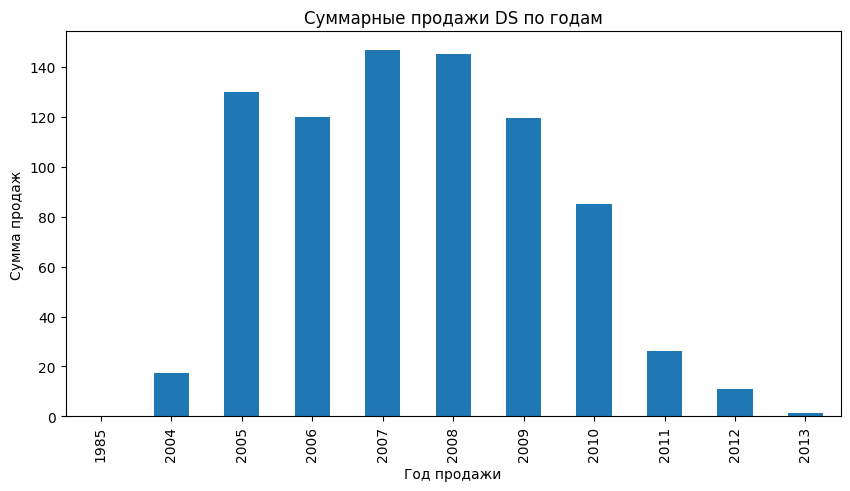

In [29]:
# Создаем список из топ 5 с наибольшими суммарными продажами
df_sales_top = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(5).index.to_list()

# Создаем цикл ктороый выведет суммарные продажи списком и построит график
for i in df_sales_top:
    # Суммарные продажи игры по годам
    print('Сумма продаж игр', i, 'по годам: \n', df.query(f"platform == '{i}'").groupby('year_of_release')['sum_sales'].sum())
    
    # График распределения продаж по годам
    df.query(f"platform == '{i}'").groupby('year_of_release')['sum_sales'].sum().plot.bar(figsize = (10, 5))
    plt.title(f"Суммарные продажи {i} по годам")
    plt.xlabel("Год продажи")
    plt.ylabel("Сумма продаж")
    plt.show()

**Вывод:**

Платформы с наиболее продаваемыми играми это PS2, X360, PS3, Wii, DS.

Если рассмотреть детально эти платформы, по годам, то видно, что средний срок жизни платформы, 10-11 лет.

Пик продаж в среднем 8 лет.
    

### Анализ актуального периода

In [30]:
# топ продаж по платформам
df.query('year_of_release > 2011').groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

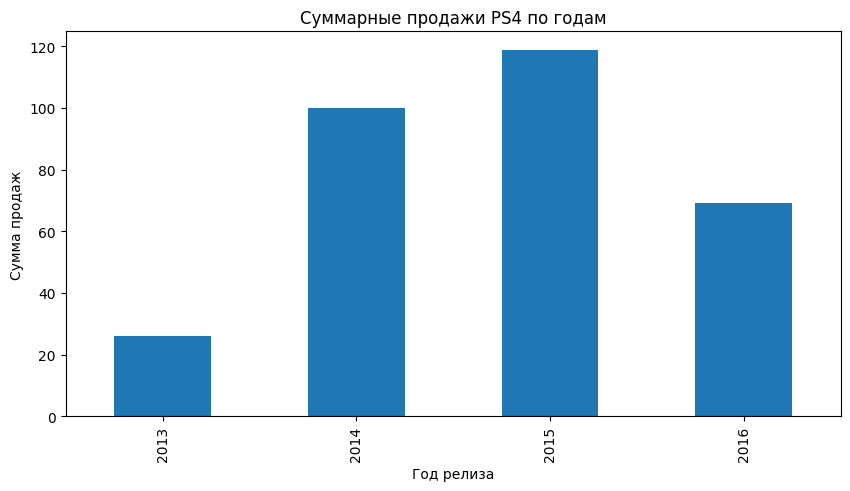

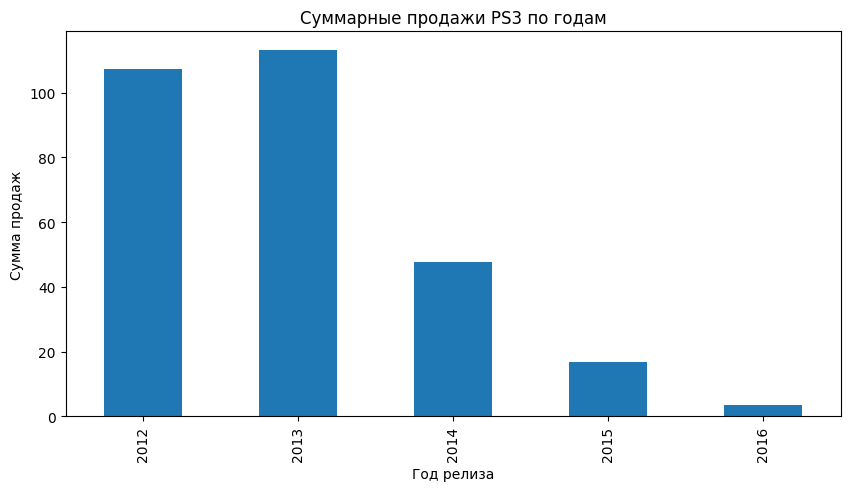

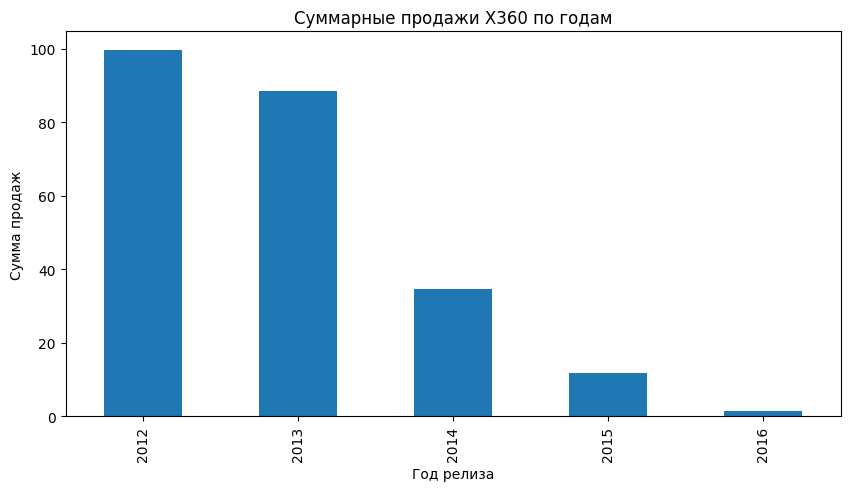

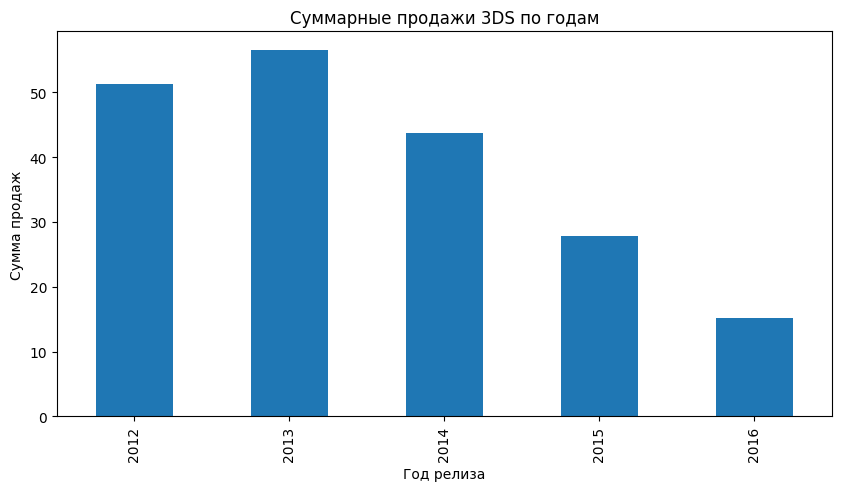

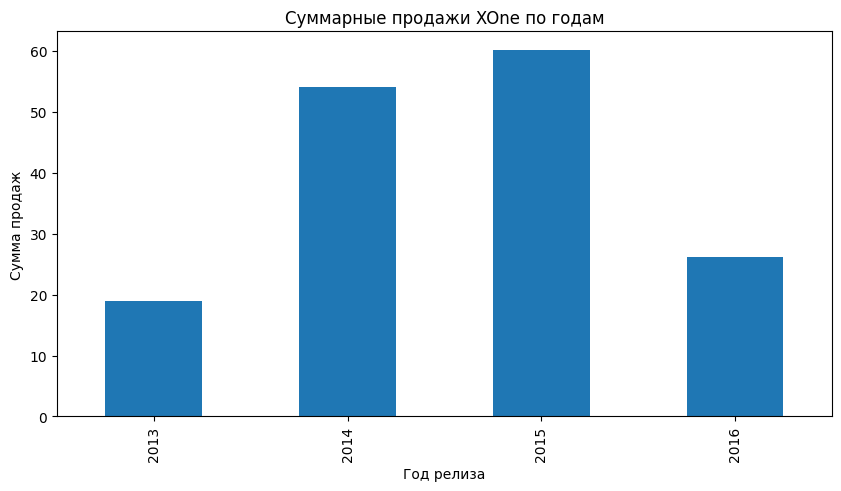

In [32]:
# Создаем список из топ 5 с наибольшими суммарными продажами
df_sales_top = df.query('year_of_release > 2011').groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(5).index.to_list()

# Создаем цикл ктороый выведет суммарные продажи списком и построит график
for i in df_sales_top:
    # График распределения продаж по годам
    df.query(f"platform == '{i}' & year_of_release > 2011").groupby('year_of_release')['sum_sales'].sum().plot.bar(figsize = (10, 5))
    plt.title(f"Суммарные продажи {i} по годам")
    plt.xlabel("Год релиза")
    plt.ylabel("Сумма продаж")
    plt.show()

**Вывод:**

Из топ 5 платформ по продажам актуального периода, только две показывают положительную динамику: PS4, XOne.

Напоминаю, что данные за 2016 год могут быть неполными.



### Диаграммы размаха

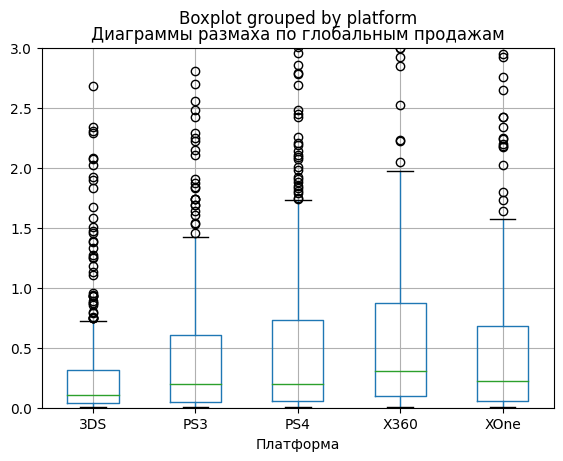

In [40]:
df.query(
    'year_of_release > 2011 & (platform == "PS4" | platform == "XOne" | platform == "PS3"| platform == "X360"| platform == "3DS")'
        ).boxplot(column='sum_sales', by='platform')
plt.title("Диаграммы размаха по глобальным продажам")
plt.xlabel("Платформа")
plt.ylim(0, 3)
plt.show()

**Вывод:**
Исходя из диаграмм размаха видно, что есть выбросы, но они не значительны. Видно, насколько медиана не стремится к длинному хвосту высоких значений.

### Диаграмма рассеяния

In [41]:
# делаем датасет для дальнейшего анализа
df_topical = df.query('year_of_release > 2011 & (platform == "PS4" | platform == "XOne") & (critic_score != 0 & user_score != 0)')[['platform','critic_score', 'user_score', 'sum_sales']]

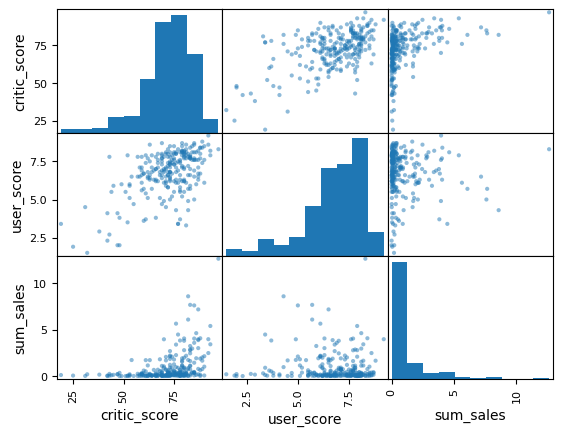

In [42]:
# строим матрицу диаграмм рассеяния по PS4
pd.plotting.scatter_matrix(df_topical[df_topical['platform'] == 'PS4'])
plt.show()

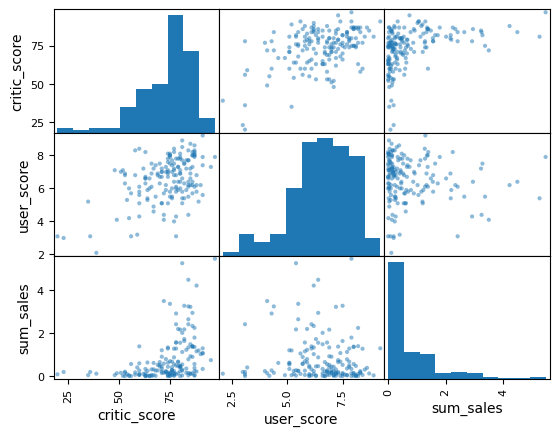

In [43]:
# строим матрицу диаграмм рассеяния по XOne
pd.plotting.scatter_matrix(df_topical[df_topical['platform'] == 'XOne'])
plt.show()

In [44]:
# Корреляция по двум переспективным платформам
df_topical.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.517664,0.392116
user_score,0.517664,1.000000,-0.044655
sum_sales,0.392116,-0.044655,1.000000


In [45]:
# Корреляция по остальным платформам
df.query('year_of_release > 2011 & (platform != "PS4" | platform != "XOne") & (critic_score != 0 & user_score != 0)')[['platform','critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.517727,0.306516
user_score,0.517727,1.000000,0.000597
sum_sales,0.306516,0.000597,1.000000


**Вывод:**

Изучив диаграмму рассеяния и корреляцию можно сделать следующие выводы:
1. Оценки пользователей никак не влияют на продажи;
2. Оценки критиков оказывают несущественно положительное влияние на продажи;
3. Если сравнивать переспективные платформы и все сотальные то разницы в корреляции между ними практически нет.

### Распределение по жанрам

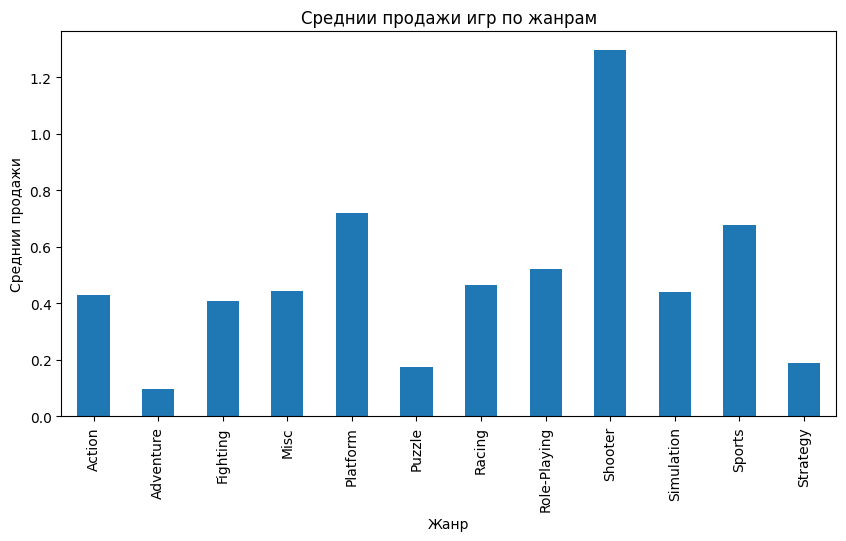

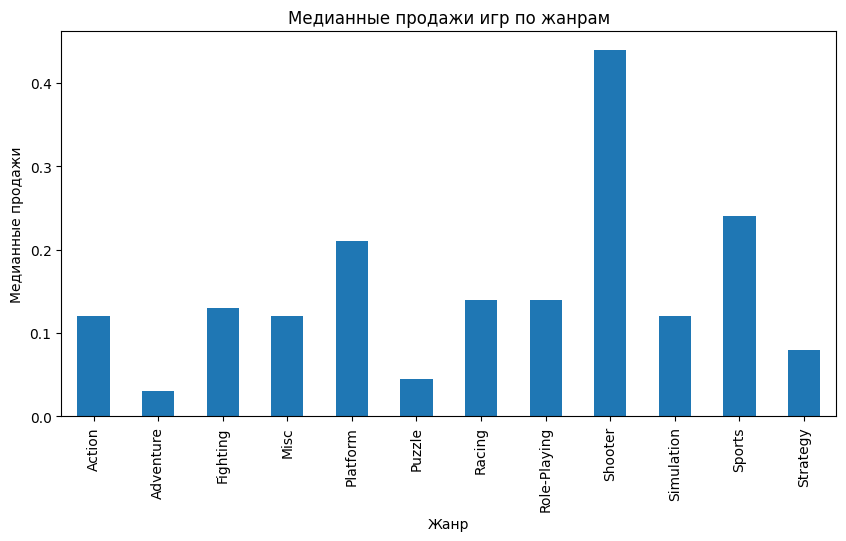

In [47]:
# строим график по средним продажам, в разрезе жанров
df.query('year_of_release > 2011').groupby('genre')['sum_sales'].mean().plot.bar(figsize = (10, 5))
plt.title('Среднии продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Среднии продажи')
plt.show()
# строим график по медианным продажам, в разрезе жанров
df.query('year_of_release > 2011').groupby('genre')['sum_sales'].median().plot.bar(figsize = (10, 5))
plt.title('Медианные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.show()

**Вывод:** Построил графики со средним и медианным значением. Самым прибыльным жанром является Shooter, причем с большим отрывом. В целом можно так же обратить внимание на жанры Sports и Platform.

## Портрет пользователя каждого региона

### ТОП-5 платформ в регионах

In [48]:
df_topical = df.query('year_of_release > 2011')

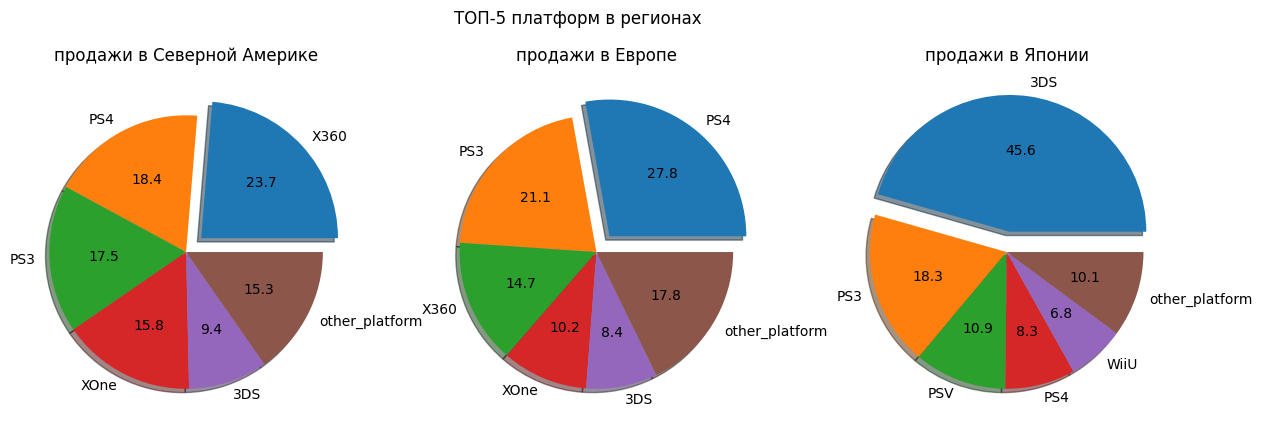

In [49]:
regions = df_topical.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('ТОП-5 платформ в регионах')
title = ['продажи в Северной Америке', 'продажи в Европе', 'продажи в Японии']
for i, region in enumerate(regions):
    df_region = (df_topical.groupby('platform')[region].sum().reset_index()
                 .sort_values(region, ascending=False, ignore_index=True)
                 .head()
    )
    new_row = pd.Series(
      {
        'platform': 'other_platform',
        region:  df_topical[region].sum() - df_region[region].sum()
      }
    ).to_frame().T
    myexplode = [0.15,0,0,0,0,0]
    df_region = pd.concat([df_region, new_row], ignore_index=True)
    axs[i].pie(df_region[region], labels=df_region['platform'], explode=myexplode, autopct='%.1f', shadow=True)
    axs[i].set_title(title[i], pad=15)

**Вывод:**

1. В Северной Америке самая популярная платформа X360
2. В Европе самая популярная платформа PS4
3. В Японии самая популярная платформа 3DS

В целом наблюдаются разные предпочтения в платформах, но они объяснимы. Консоль от Microsoft X360 пользуется большой популярностью в Северной Америке потому что, это внутренний рынок Microsoft. Nintendo 3DS так же продукт внутреннего рынка Японии, поэтому популярность высока. В Европе нет компаний делающих консоли, там больше приобладает PS4 за счет в целом больше объема представленности.

### ТОП-5 жанров в регионах

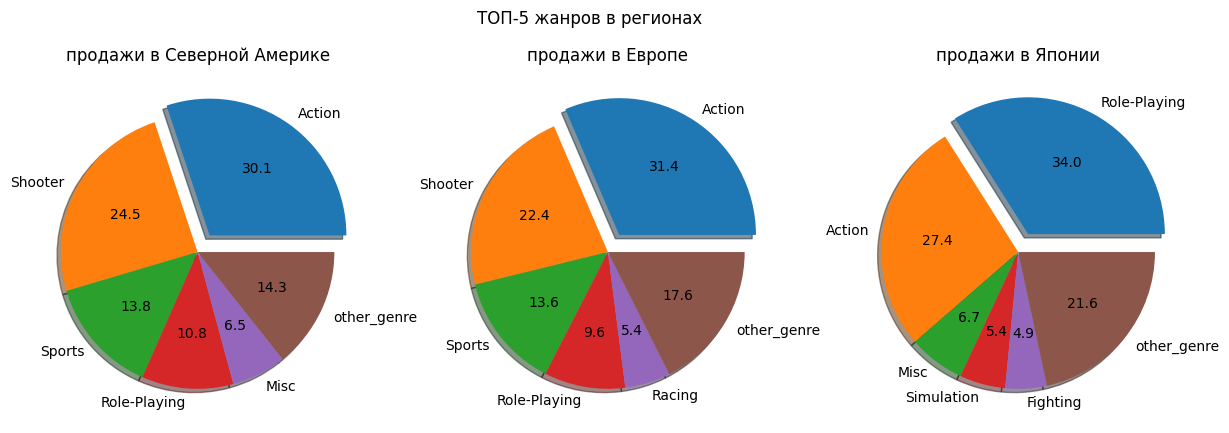

In [50]:
regions = df_topical.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('ТОП-5 жанров в регионах')
title = ['продажи в Северной Америке', 'продажи в Европе', 'продажи в Японии']
for i, region in enumerate(regions):
    df_region = (df_topical.groupby('genre')[region].sum().reset_index()
                 .sort_values(region, ascending=False, ignore_index=True)
                 .head()
    )
    new_row = pd.Series(
      {
        'genre': 'other_genre',
        region:  df_topical[region].sum() - df_region[region].sum()
      }
    ).to_frame().T
    myexplode = [0.15,0,0,0,0,0]
    df_region = pd.concat([df_region, new_row], ignore_index=True)
    axs[i].pie(df_region[region], labels=df_region['genre'], explode=myexplode, autopct='%.1f', shadow=True)
    axs[i].set_title(title[i], pad=15)

**Вывод:**

В Северной Америке и Европе предпочтения людей одинаковы, на первом месте жанр Action. В Японии предпочтения отличаются, первое место занимает Role-Playing.
Отличие Северной Америке и Европе по отношению к Японии может быть связано с отличающейся культурой.

### Влияние рейтинга ESRB на продажи в отдельном регионе

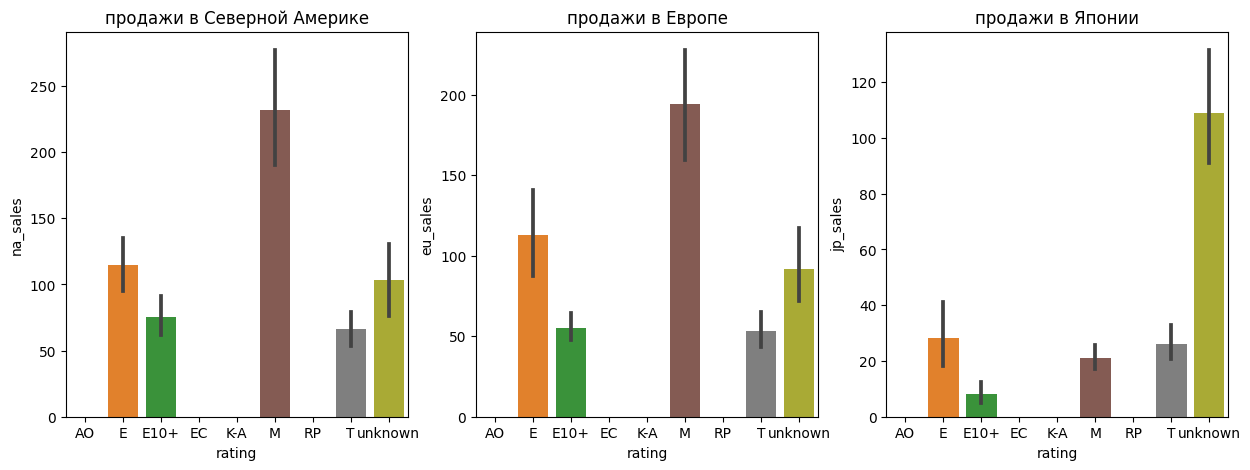

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(y='na_sales', x='rating', data = df_topical, estimator=sum, ax=axs[0]).set_title('продажи в Северной Америке');
sns.barplot(y='eu_sales', x='rating', data = df_topical, estimator=sum, ax=axs[1]).set_title('продажи в Европе');
sns.barplot(y='jp_sales', x='rating', data = df_topical, estimator=sum, ax=axs[2]).set_title('продажи в Японии');

**Вывод:**

Влияние рейтинга есть, и это проявляется на графиках, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [52]:
df_topical.query('platform == "XOne"')['user_score']

99       0.0
165      7.9
179      5.4
241      6.4
269      6.2
        ... 
16359    8.2
16372    6.6
16374    0.0
16389    6.7
16401    0.0
Name: user_score, Length: 247, dtype: float64

In [53]:
alpha = 0.05

results = st.ttest_ind(
    df_topical.query('platform == "XOne"')['user_score'],
    df_topical.query('platform == "PC"')['user_score']
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0679776646270018
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные.

p-значение: 0.0679776646270018. Не получилось отвергнуть нулевую гипотезу.

Применялся инструмент для проверки гипотезы о равенстве средних двух генеральных совокупностей.

### Средние пользовательские рейтинги жанров Action и Sports разные.

In [54]:
alpha = 0.01

results = st.ttest_ind(
    df_topical.query('genre == "Action"')['user_score'],
    df_topical.query('genre == "Sports"')['user_score']
)
print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.030525082904009942
Отвергаем нулевую гипотезу


**Вывод:**

H0 - Средние пользовательские рейтинги платформ жанров Action и Sports разные.

H1 - Средние пользовательские рейтинги платформ жанров Action и Sports одинаковые.

p-значение: 0.0679776646270018. Не получилось отвергнуть нулевую гипотезу.

Применялся инструмент для проверки гипотезы о равенстве средних двух генеральных совокупностей.

## Общий вывод

**1. При предобработке данных были сделаны следющие шаги и выводы:**

    1.1 Удалил пропуски в столбцах с именем, жанром и годом выпуска, так как пропусков незначительное количество, а релевантная замена не предоставляется возможной.
    1.2 Пропуски в рейтинге заполнил словом неизвестно, для приобразования в дальнейшем в другой тип данных.
    1.3 В оценках заменил пропуски на 0, изучив что оценки ноль нет в оценках критиков а в оценках пользователей всего одна запись, можно сделать вывод что 0 можно использовать как отсутствие оценки(заглушку).
    1.4 Пропуски могли возникнуть по двум причинам: 
        1.4.1 Данные собирались из разных источников и могла произойти ошибка при выгрузке и соединении данных;
        1.4.2 Данные были намеренно пропущены так как это означает что этих данных нет по разным причинам (нет оценки, не захотели получать рейтинг).

**2. Ознакомившись с уникальными данными по столбцам в которых необходимо преобразовать данные сделал преобразование данных.**
    
    2.1 Год релиза привел к целым значениям как и пологается;
    2.2 Оценки критиков без дробной части, привел к целым числам;
    2.3 Оценка пользователей содержала текстовый атрибут, ознакомившись с его значением, заменил его на 0 (так как это означает в ожидании оценки или нет оценки), привел к вещественным числам;
    2.4 Рейтинг привел к типу категория, чем он и является.
    

**3. Проанализировав выпуск игр по годам с помощью гистограммы пришел к ледующим вывода:**
    
    Исходя из гистограммы видно что основное количество игр приходиться на период с 2000 года, что так же подтверждает описательная статистика, 25% - 2003, медиана - 2006. При анализе данных по годам рекомендуется брать выборку с 2000 года. Если нужен актуальные период, то с 2012 года.    
    
**4. Следйющим шагом проанализировал игры по платформам и пришел к следующим выводам:**
    
    4.1 Платформы с наиболее продаваемыми играми это PS2, X360, PS3, Wii, DS.
    4.2 Если рассмотреть детально эти платформы, по годам, то видно, что средний срок жизни платформы, 10-11 лет.
    4.3 Пик продаж в среднем 8 лет.

**5. Проанализировав актуальный период для выявления потенциально прибыльных платформ получил следующие результаты:**

    Из топ 5 платформ по продажам актуального периода, только две показывают положительную динамику: PS4, XOne.
    Напоминаю, что данные за 2016 год могут быть неполными.

**6. Изучил диаграммы размаха и рассеяния**

    6.1 Исходя из диаграмм размаха видно, что есть выбросы, но они не значительны. Видно, насколько медиана не стремится к длинному хвосту высоких значений.
    6.2 Изучив диаграмму рассеяния и корреляцию можно сделать следующие выводы:
        6.2.1 Оценки пользователей никак не влияют на продажи;
        6.2.2 Оценки критиков оказывают несущественно положительное влияние на продажи;
        6.2.3 Если сравнивать переспективные платформы и все сотальные то разницы в корреляции между ними практически нет.

**7. Изучив распределение игр по жанрам получились следующие выводы:**

    Самым прибыльным жанром является Shooter, причем с большим отрывом. В целом можно так же обратить внимание на жанры Sports и Platform.
    
**8. Изучил портрет пользователя каждого региона**

    8.1 ТОП-5 платформ в регионах
        8.1.1 В Северной Америке самая популярная платформа X360
        8.1.2 В Европе самая популярная платформа PS4
        8.1.3 В Японии самая популярная платформа 3DS
        8.1.4 В целом наблюдаются разные предпочтения в платформах, но они объяснимы. Консоль от Microsoft X360 пользуется большой популярностью в Северной Америке потому что, это внутренний рынок Microsoft. Nintendo 3DS так же продукт внутреннего рынка Японии, поэтому популярность высока. В Европе нет компаний делающих консоли, там больше приобладает PS4 за счет в целом больше объема представленности.
    8.2 ТОП-5 жанров в регионах
        В Северной Америке и Европе предпочтения людей одинаковы, на первом месте жанр Action. В Японии предпочтения отличаются, первое место занимает Role-Playing. Отличие Северной Америке и Европе по отношению к Японии может быть связано с отличающейся культурой.
    8.3 Влияние рейтинга ESRB на продажи в отдельном регионе
        Влияние рейтинга есть, и это проявляется на графиках, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.
        
**9. В заключении анализа были проверены несколько гипотез**

    9.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные.
        p-значение: 0.0679776646270018. Не получилось отвергнуть нулевую гипотезу.
        Применялся инструмент для проверки гипотезы о равенстве средних двух генеральных совокупностей.
    9.2 Средние пользовательские рейтинги жанров Action и Sports разные.
        H0 - Средние пользовательские рейтинги платформ жанров Action и Sports разные.
        H1 - Средние пользовательские рейтинги платформ жанров Action и Sports одинаковые.
        p-значение: 0.0679776646270018. Не получилось отвергнуть нулевую гипотезу.
        Применялся инструмент для проверки гипотезы о равенстве средних двух генеральных совокупностей.
        
**10. Заключительный вывод**

    При планировании компании на следующий год, изходя ис тех данных что мы получили, можно сделать вывод, что фокус внимания нужно уделить двум платформам PS4, XOne и играм в жанре Action, Shooter и в дополении расмотрел бы так же Role-Playing (из-за популярности жанра в Японии) или Sports (из-за хорошой стабильной доходности). Если выбирать из дополнительных параметров то ориентировался бы на игры с рейтингом "М" или вообще без рейтинга.